# 🧠 Análise de Sentimentos - NPS MRV

Este notebook realiza uma análise exploratória e de sentimentos sobre os comentários da base NPS fornecida pela MRV no processo seletivo.

## Objetivos:
- Carregar a base de dados
- Limpar e pré-processar os comentários
- Aplicar análise de sentimentos
- Explorar insights iniciais com gráficos


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Carregar a base
df = pd.read_excel(r'C:\Users\andre\OneDrive\Área de Trabalho\Análise de Dados\desafio-processo-seletivo-mrv-2025\base_de_nps_-_processo_seletivo.xlsx', sheet_name='Export')



# Exibir primeiras linhas
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Data Opinião,Classificacao do Respondente,Regional MRV,Cidade_Loja,Comentário,Codigo_Chamado_Nota_AT
0,2023-01-01,Detrator,MG,Uberlândia,Aumentos demais na parcela do meu parcelamento...,NaN
1,2023-01-03,Promotor,ES,Cariacica,NaN,NaN
2,2023-01-02,Detrator,NE,João Pessoa,NaN,NaN
3,2023-01-02,Detrator,NE,Feira de Santana,Atendimento e suporte péssimo,NaN
4,2023-01-02,Promotor,SP,São José dos Campos,NaN,NaN


## 🧹 Limpeza e tratamento dos dados

In [3]:

# Remover comentários nulos
df = df[df['Comentário'].notna()].copy()

# Resetar índice
df.reset_index(drop=True, inplace=True)

print(f'Total de comentários válidos: {len(df)}')
df[['Comentário']].sample(5)


Total de comentários válidos: 15161


,Comentário
12708,Bom
2043,"Tive que resolver, problema sozinho.. referent..."
13542,Essa nota é porque acredito que o ap poderia s...
2551,Minha história com a MRV e bem sucedida me aj...
8182,Ótimo atendimento


## 🔍 Análise de Sentimentos com VADER

In [4]:

sia = SentimentIntensityAnalyzer()

# Aplicar análise de sentimento
df['sentiment_score'] = df['Comentário'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classificar sentimento
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positivo'
    elif score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutro'

df['sentimento'] = df['sentiment_score'].apply(classify_sentiment)

df[['Comentário', 'sentiment_score', 'sentimento']].head(10)


,Comentário,sentiment_score,sentimento
0,Aumentos demais na parcela do meu parcelamento...,-0.296,Negativo
1,Atendimento e suporte péssimo,0.000,Neutro
2,Flexibilidad e,0.000,Neutro
3,Construção completa deve ser alterada.,0.000,Neutro
4,Excelente profissionais!!,0.000,Neutro
5,Bom atendimento,0.000,Neutro
6,Construção de qualidade.,0.000,Neutro
7,"Melhorar na acústica dos APs, da pra escutar t...",0.000,Neutro
8,Na instrutura do dos AP,0.000,Neutro
9,"O apartamento veio com acabamento muito ruim, ...",-0.296,Negativo


## 📊 Visualização dos sentimentos detectados

C:\Users\andre\AppData\Local\Temp\ipykernel_23544\13373794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimento', palette='Set2')


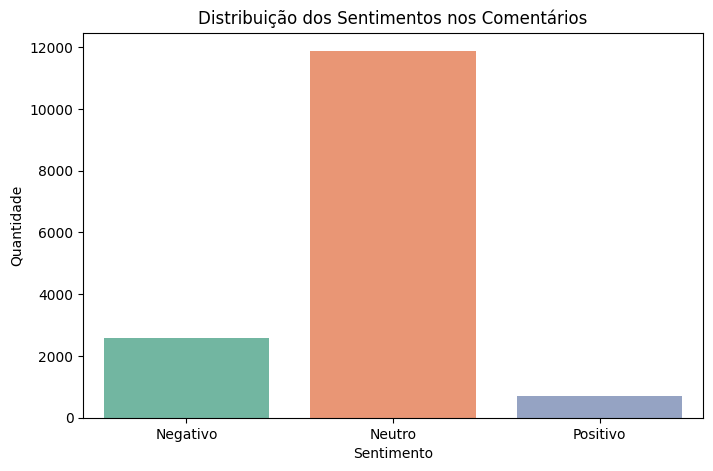

In [5]:

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentimento', palette='Set2')
plt.title('Distribuição dos Sentimentos nos Comentários')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.show()


In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install wordcloud


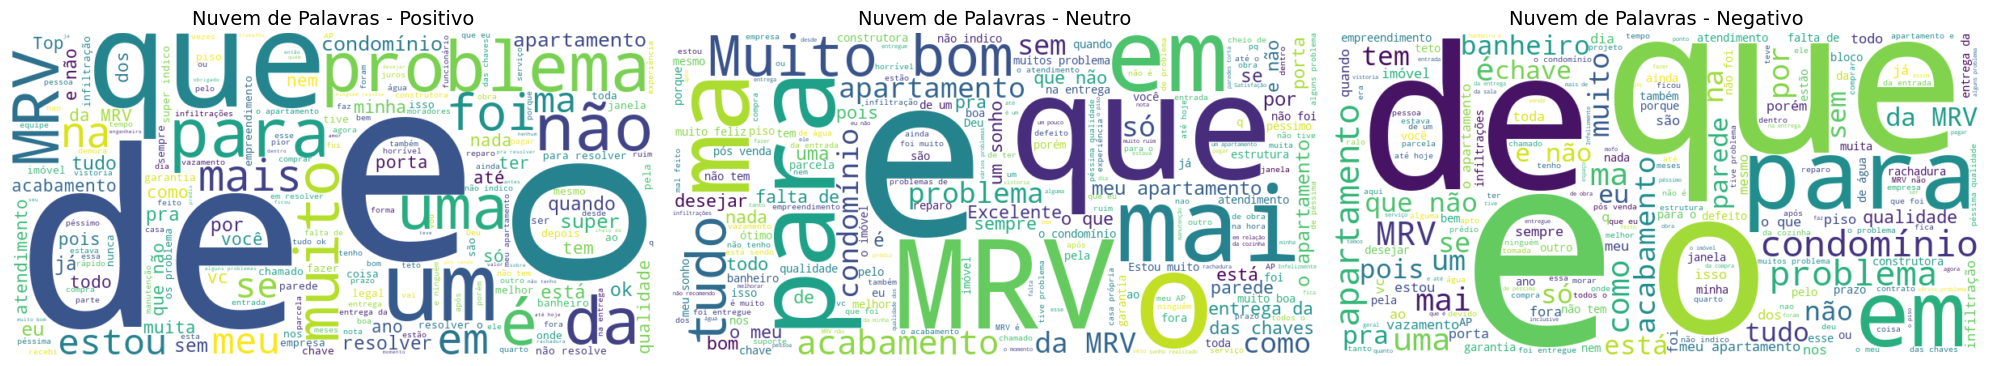

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gerar nuvem de palavras por sentimento
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, sentimento in enumerate(['Positivo', 'Neutro', 'Negativo']):
    comentarios = " ".join(df[df['sentimento'] == sentimento]['Comentário'].astype(str).tolist())
    nuvem = WordCloud(width=800, height=400, background_color='white').generate(comentarios)
    
    axes[i].imshow(nuvem, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Nuvem de Palavras - {sentimento}', fontsize=14)

plt.tight_layout()
plt.show()


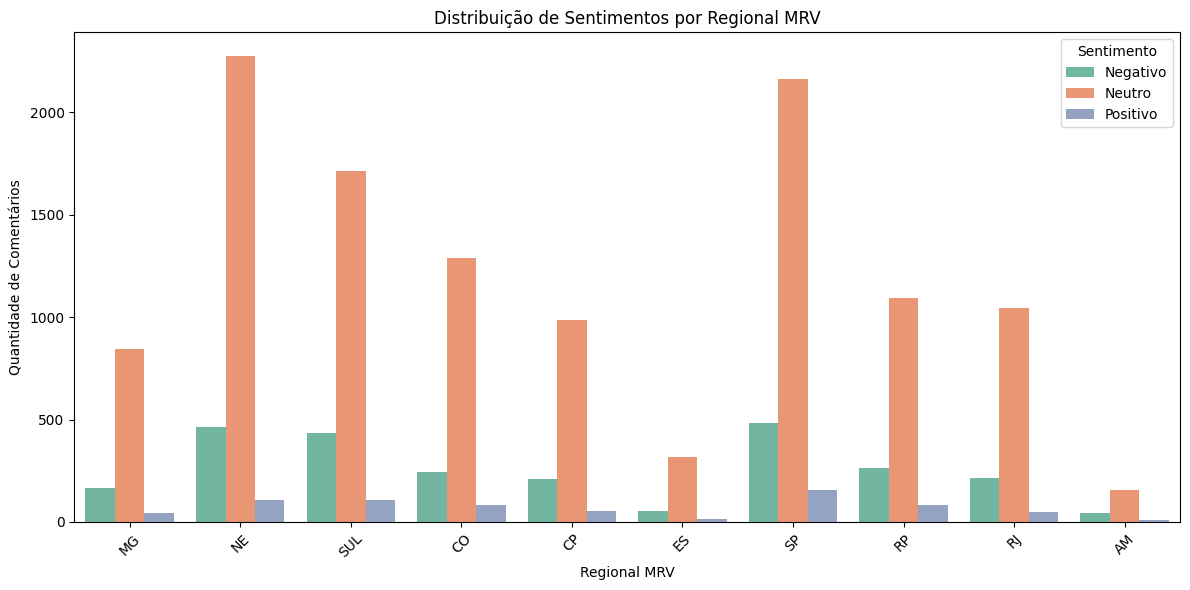

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Regional MRV', hue='sentimento', palette='Set2')
plt.title('Distribuição de Sentimentos por Regional MRV')
plt.xlabel('Regional MRV')
plt.ylabel('Quantidade de Comentários')
plt.legend(title='Sentimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


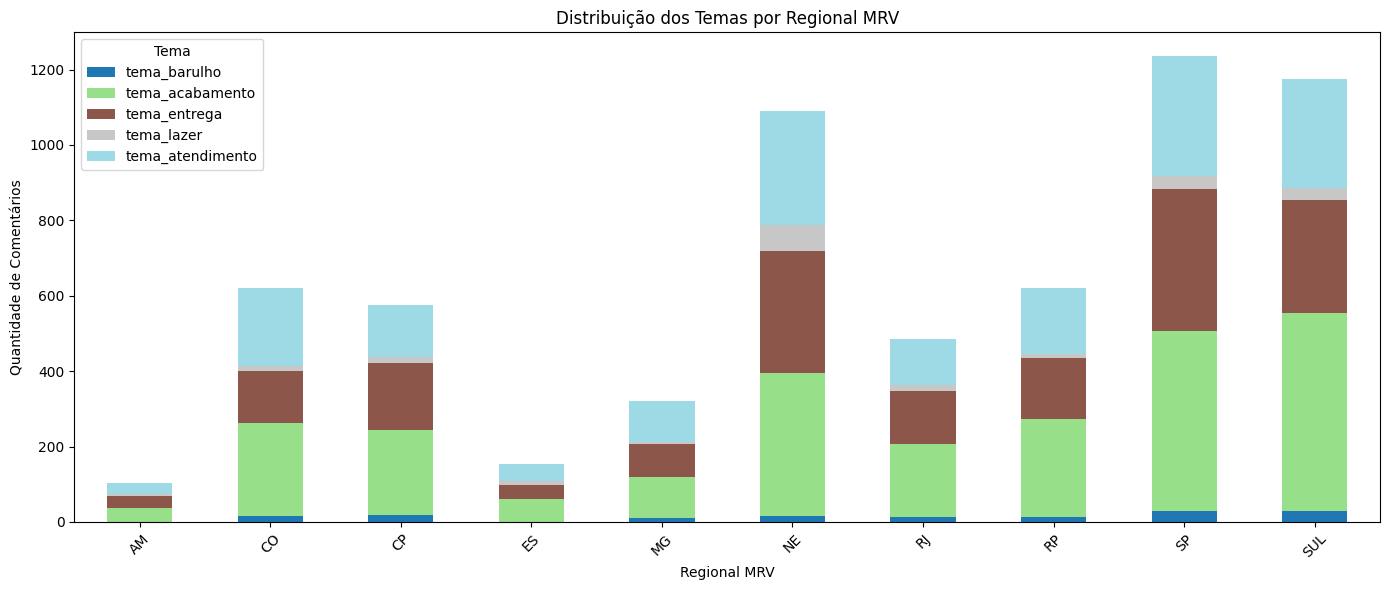

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recarregar base (caso precise)
df = pd.read_excel(r'C:\Users\andre\OneDrive\Área de Trabalho\Análise de Dados\desafio-processo-seletivo-mrv-2025\base_de_nps_-_processo_seletivo.xlsx', sheet_name='Export')
df = df[df['Comentário'].notna()].copy()
df.reset_index(drop=True, inplace=True)

# Criar colunas de tema com base em palavras-chave
df['tema_barulho'] = df['Comentário'].str.contains(r'\bbarulho|ru[íi]do|som\b', case=False, na=False)
df['tema_acabamento'] = df['Comentário'].str.contains(r'\bacabamento|infiltra|rachadura|pintura|rebo[çc]o|azulejo\b', case=False, na=False)
df['tema_entrega'] = df['Comentário'].str.contains(r'\bentrega|prazo|atraso|demora\b', case=False, na=False)
df['tema_lazer'] = df['Comentário'].str.contains(r'\bpiscina|playground|churrasqueira|quadra\b', case=False, na=False)
df['tema_atendimento'] = df['Comentário'].str.contains(r'\batendimento|corretor|suporte|vendedor|p[oó]s[- ]venda\b', case=False, na=False)

# Agrupar por regional e contar incidência dos temas
temas_regionais = df.groupby('Regional MRV')[[
    'tema_barulho', 'tema_acabamento', 'tema_entrega', 'tema_lazer', 'tema_atendimento'
]].sum().astype(int)

# Plotar gráfico
temas_regionais.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Distribuição dos Temas por Regional MRV')
plt.ylabel('Quantidade de Comentários')
plt.xlabel('Regional MRV')
plt.xticks(rotation=45)
plt.legend(title='Tema')
plt.tight_layout()
plt.show()


In [11]:
!pip install requests beautifulsoup4 pandas openpyxl
!python scraping_direcional.py

Dados salvos em 'direcional_imoveis.xlsx'


In [12]:
pip install selenium pandas openpyxl


Note: you may need to restart the kernel to use updated packages.
